In [2]:
import torch 
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [26]:
data_dir = r"/kaggle/input/nn-assignment-dataset"
IMAGE_SIZE = 64

transform = transforms.Compose([
    transforms.Resize(size=IMAGE_SIZE),
    transforms.CenterCrop(size=IMAGE_SIZE),
    transforms.ToTensor()
])

data = datasets.ImageFolder(root=data_dir, transform=transform)

In [27]:
class_names = data.classes
class_names

['Bart', 'Homer']

In [28]:
train_ratio = 0.9  
train_size = int(train_ratio * len(data))
test_size = len(data) - train_size

train_ds, test_ds = random_split(data, [train_size, test_size])

In [29]:
len(train_ds), len(test_ds)

(242, 27)

In [30]:
BATCH_SIZE = 32

train_dataLoader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_dataLoader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

len(train_dataLoader), len(test_dataLoader)

(8, 1)

In [38]:
# I have written all these python scripts and is taken from another project that I am working on

import sys
sys.path.insert(1, "/kaggle/input/scriptss1/my_scripts")
import train, utils, transfer_learning

Visualizing images


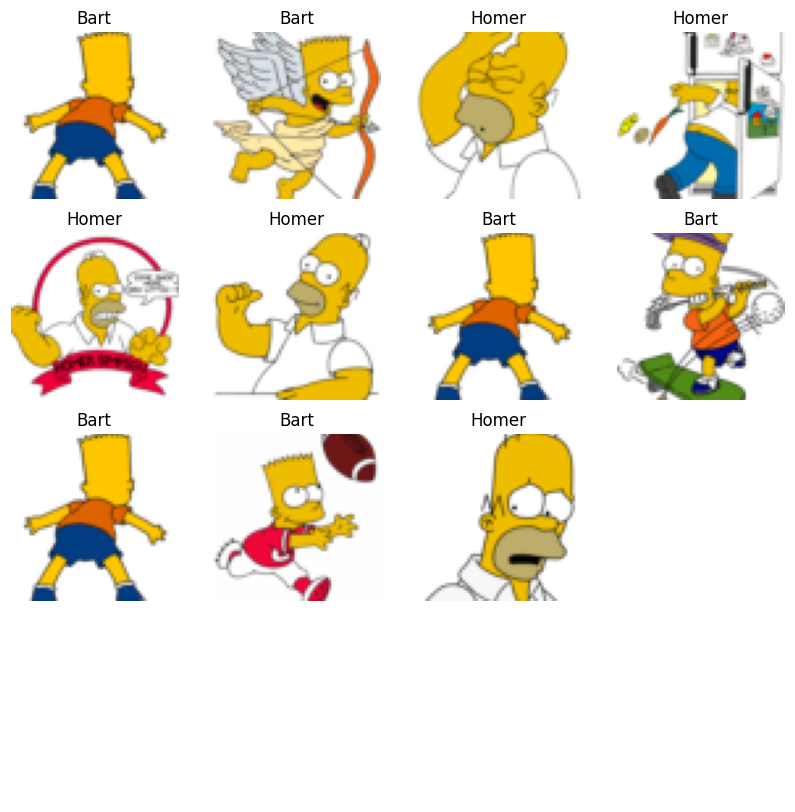

In [39]:
utils.visualize_images_from_dataLoader(train_dataLoader, class_names, 11)

Visualizing images


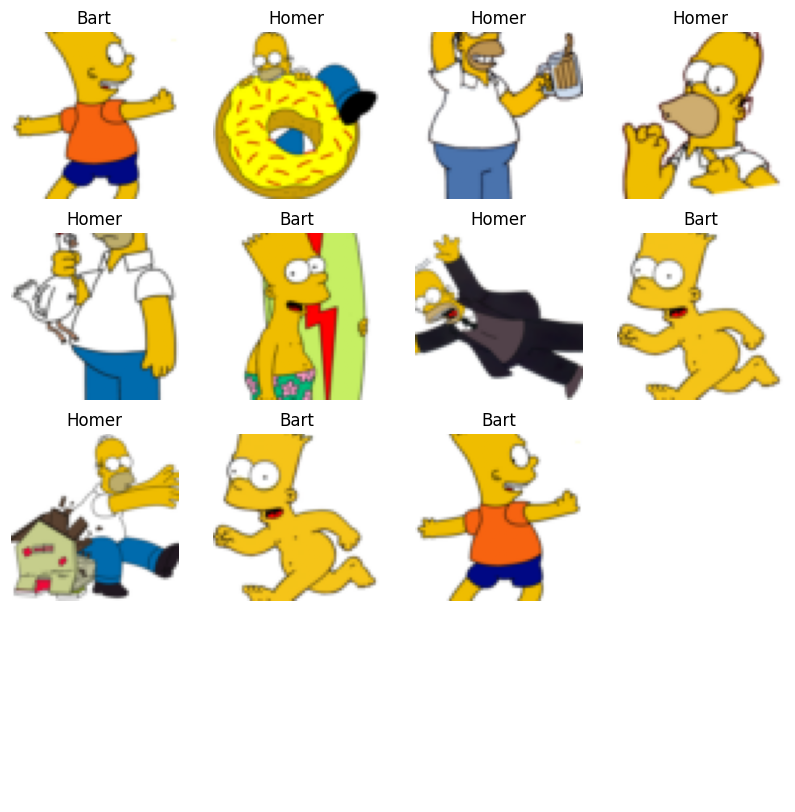

In [40]:
utils.visualize_images_from_dataLoader(test_dataLoader, class_names, 11)

In [78]:
class CustomModel(nn.Module):
    def __init__(self,
                image_size: int,
                num_classes: int):
        super(CustomModel, self).__init__()

        self.layer = nn.Sequential(nn.Flatten(),
                                   nn.Linear(in_features=image_size*image_size*3, out_features=1024),
                                   nn.ReLU(),
                                   nn.Linear(in_features=1024, out_features=256),
                                   nn.ReLU(),
                                   nn.Linear(in_features=256, out_features=128),
                                   nn.ReLU(),
                                   nn.Linear(in_features=128, out_features=32),
                                   nn.ReLU(),
                                   nn.Linear(in_features=32, out_features=num_classes))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer(x)

In [79]:
model = CustomModel(IMAGE_SIZE, len(class_names)).to(device)
model(torch.randn(32,3,64,64).to(device)).shape

torch.Size([32, 2])

In [80]:
from torchinfo import summary

summary(model, input_size=(32,3,64,64), col_names=['input_size','output_size', 'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CustomModel                              [32, 3, 64, 64]           [32, 2]                   --
├─Sequential: 1-1                        [32, 3, 64, 64]           [32, 2]                   --
│    └─Flatten: 2-1                      [32, 3, 64, 64]           [32, 12288]               --
│    └─Linear: 2-2                       [32, 12288]               [32, 1024]                12,583,936
│    └─ReLU: 2-3                         [32, 1024]                [32, 1024]                --
│    └─Linear: 2-4                       [32, 1024]                [32, 256]                 262,400
│    └─ReLU: 2-5                         [32, 256]                 [32, 256]                 --
│    └─Linear: 2-6                       [32, 256]                 [32, 128]                 32,896
│    └─ReLU: 2-7                         [32, 128]                 [32, 128]                 --
│    └─Linear: 2-8

In [81]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
EPOCHS = 10

In [82]:
history = train.fit(model, train_dataLoader, test_dataLoader, EPOCHS, loss_fn, optimizer, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch = 0


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.87, Train accuracy =  54.73%
Val loss =  0.81, Val accuracy =  51.85%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 1


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.72, Train accuracy =  50.39%
Val loss =  0.70, Val accuracy =  48.15%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 2


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.69, Train accuracy =  54.04%
Val loss =  0.68, Val accuracy =  48.15%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 3


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.67, Train accuracy =  55.77%
Val loss =  0.63, Val accuracy =  74.07%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 4


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.62, Train accuracy =  64.50%
Val loss =  0.81, Val accuracy =  51.85%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 5


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.67, Train accuracy =  60.59%
Val loss =  0.64, Val accuracy =  66.67%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 6


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.60, Train accuracy =  66.54%
Val loss =  0.59, Val accuracy =  74.07%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 7


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.52, Train accuracy =  75.74%
Val loss =  0.56, Val accuracy =  74.07%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 8


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.50, Train accuracy =  77.60%
Val loss =  0.58, Val accuracy =  70.37%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Epoch = 9


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Train loss =  0.52, Train accuracy =  74.18%
Val loss =  0.59, Val accuracy =  66.67%
_________________________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________________________

Total time taken for training =  20.66 seconds.


### Best Test Accuracy = 74.07%
### I couldn't find any architecture better than this. Please let me know if you found one through which you got >= 90% test accuracy

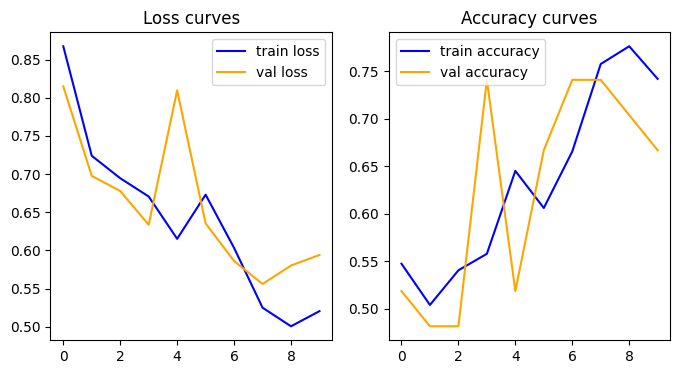

In [83]:
utils.plot_loss(history)